In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
import pandas as pd

df = pd.DataFrame(iris.data)
df = df.drop([2,3], axis='columns')
df['target'] = iris.target
df.head()

,0,1,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


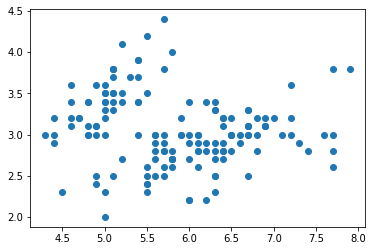

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df[0], df[1])

In [21]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df.drop(['target'], axis='columns'))
df['predicted'] = y_predicted
df.head()

,0,1,target,predicted
0,5.1,3.5,0,1
1,4.9,3.0,0,1
2,4.7,3.2,0,1
3,4.6,3.1,0,1
4,5.0,3.6,0,1


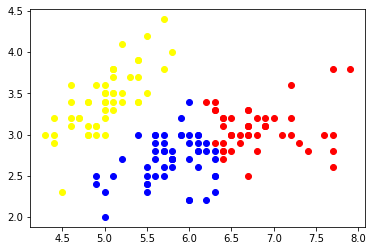

In [23]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]

plt.scatter(df0[0], df0[1], color='red')
plt.scatter(df1[0], df1[1], color='yellow')
plt.scatter(df2[0], df2[1], color='blue')

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.target, df.predicted)
cm

array([[ 0, 50,  0],
       [12,  0, 38],
       [35,  0, 15]], dtype=int64)

Text(33.0, 0.5, 'True')

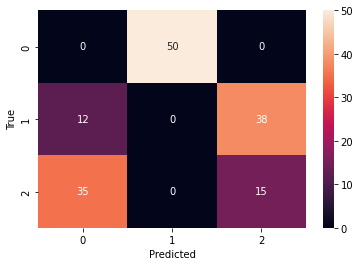

In [25]:
import seaborn as sb

sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[0] = scaler.fit(df[[0]]).transform(df[[0]])
df[1] = scaler.fit(df[[1]]).transform(df[[1]])
df.head()

,0,1,target,predicted
0,0.222222,0.625000,0,1
1,0.166667,0.416667,0,1
2,0.111111,0.500000,0,1
3,0.083333,0.458333,0,1
4,0.194444,0.666667,0,1


In [35]:
model = KMeans(n_clusters=3)
df.predicted = model.fit_predict(df.drop(['target', 'predicted'], axis='columns'))

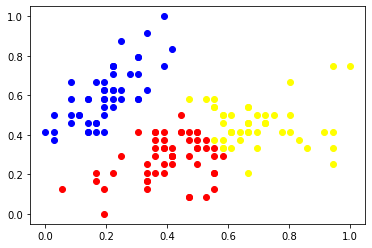

In [36]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]

plt.scatter(df0[0], df0[1], color='red')
plt.scatter(df1[0], df1[1], color='yellow')
plt.scatter(df2[0], df2[1], color='blue')

In [37]:
cm = confusion_matrix(df.target, df.predicted)
cm

array([[ 1,  0, 49],
       [37, 13,  0],
       [16, 34,  0]], dtype=int64)

Text(33.0, 0.5, 'True')

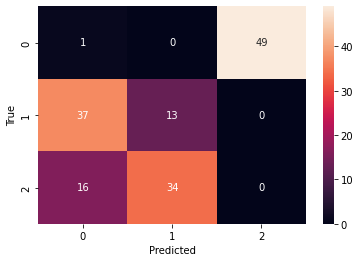

In [38]:
import seaborn as sb

sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [39]:
k_range = range(1, 10)
sse = []
for k in k_range:
    means = KMeans(n_clusters=k)
    means.fit(df.drop(['predicted', 'target'], axis='columns'))
    sse.append(means.inertia_)
sse

[12.797757201646087,
 6.85529052603328,
 4.115194202754064,
 3.217483856523378,
 2.569827309485048,
 2.2428059959623425,
 1.8185829078246183,
 1.5309480258173975,
 1.274234247506002]

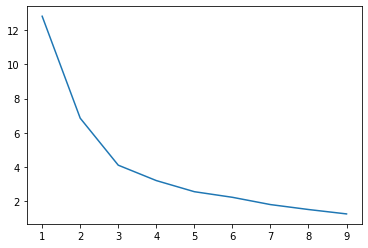

In [40]:
plt.plot(k_range, sse)